Taken from main06.cc Pythia example. A study of event properties of LEP1 events

In [1]:
from numpythia import Pythia, hepmc_write, hepmc_read
from numpythia import STATUS, HAS_END_VERTEX, ABS_PDG_ID

from pyjet import cluster, DTYPE_PTEPM
from pyjet.testdata import get_event

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
DTYPE = np.float64
DTYPE_EP = np.dtype([('E', DTYPE), ('px', DTYPE), ('py', DTYPE), ('pz', DTYPE)])

In [3]:
DTYPE_EP

dtype([('E', '<f8'), ('px', '<f8'), ('py', '<f8'), ('pz', '<f8')])

In [4]:
#Pythia Settings

params = {"Beams:idA" : "11", "Beams:idB" : "-11","Beams:eCM": 91.1876, "WeakSingleBoson:ffbar2gmZ" : "on", "23:onMode": "off", "23:onIfAny": "1 2 3 4 5", "PDF:lepton": "off"}
pythia = Pythia(params =params)

selection = ((STATUS == 1) & ~HAS_END_VERTEX)

In [5]:
array = []
for event in pythia(events=1):
    array = event.all(selection)
    #muplus = array[array["pdgid"] == 13] Example of cuts
    #sequence = cluster(array, R = 0.5, p = -1, ep=True)
    #jets = sequence.inclusive_jets(ptmin=10)

In [6]:
from skhep.dataset.numpydataset import *

data = NumpyDataset(array)

In [7]:
n = len(array)

sumE = sum(array['E'])
sump = sum(array['px']**2 + array['py']**2 + array['pz']**2)

In [8]:
mass = []
mass = sumE*sumE - sump
print(np.sqrt(mass))

81.48224624876968


In [9]:
from pyqubo import Spin, Array

In [10]:
s = Array.create('s', shape=len(array), vartype='BINARY')

#H = sum([ (array[i]['px']*array[j]['px'] + array[i]['py']*array[j]['py'] + array[i]['pz']*array[j]['pz'] - array[i]['E']*array[j]['E'] * np.cos(np.pi/4.))/(1 - np.cos(np.pi/4))*s[i]*s[j] for i in range(len(array)) for j in range(len(array))])
n_part = len(array)

coeff = [[0] * n_part for _ in range(n_part)] 
#print(coeff)

for i in range(0,n_part):
    for j in range(0,n_part):
        coeff[i][j] = (array[i]['px']*array[j]['px'] + array[i]['py']*array[j]['py'] + array[i]['pz']*array[j]['pz'] - array[i]['E']*array[j]['E'] * np.cos(np.pi/4.))/(1 - np.cos(np.pi/4))
        #array[i]['px']*array[j]['px'] + array[i]['py']*array[j]['py'] + array[i]['pz']*array[j]['pz']

#print(coeff[41][12])        

H = sum([ coeff[i][j]*s[i]*s[j] for i in range(len(array)) for j in range(len(array))])

#print(H)

model = H.compile()
qubo, offset = model.to_qubo()

In [11]:
model

Model(CompiledQubo({('s[0]', 's[0]'): 589.809344881639,
 ('s[0]', 's[10]'): -7573.736860065115,
 ('s[0]', 's[11]'): -3944.958796693059,
 ('s[0]', 's[12]'): 6.280348886340427,
 ('s[0]', 's[13]'): -1.2882113538841469,
 ('s[0]', 's[14]'): -7.336891780873562,
 ('s[0]', 's[15]'): -1.0816612656551303,
 ('s[0]', 's[16]'): -429.13628493749513,
 ('s[0]', 's[17]'): -227.80860551653896,
 ('s[0]', 's[18]'): -163.42669128781182,
 ('s[0]', 's[19]'): -111.45055683375045,
 ('s[0]', 's[1]'): 602.0821540295593,
 ('s[0]', 's[20]'): -0.37358716831867933,
 ('s[0]', 's[2]'): 133.2837548834037,
 ('s[0]', 's[3]'): 40.23358123775465,
 ('s[0]', 's[4]'): -165.47565825327874,
 ('s[0]', 's[5]'): 8.898422939267682,
 ('s[0]', 's[6]'): 10.941145770782315,
 ('s[0]', 's[7]'): -2.7719630528929633,
 ('s[0]', 's[8]'): -4.223126295533894,
 ('s[0]', 's[9]'): -41.816033775478054,
 ('s[10]', 's[10]'): 715.2667543821996,
 ('s[10]', 's[11]'): 745.0500715790793,
 ('s[10]', 's[12]'): -457.75339594688205,
 ('s[10]', 's[13]'): -47.

In [12]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

In [13]:
sampler = EmbeddingComposite(DWaveSampler(solver={'qpu':True}))
response = sampler.sample_qubo(qubo)

In [14]:
for sample in response:
    print(sample)

{'s[0]': 1, 's[10]': 1, 's[11]': 1, 's[12]': 1, 's[13]': 0, 's[14]': 0, 's[15]': 0, 's[16]': 1, 's[17]': 1, 's[18]': 1, 's[19]': 1, 's[1]': 1, 's[20]': 1, 's[2]': 1, 's[3]': 1, 's[4]': 1, 's[5]': 1, 's[6]': 1, 's[7]': 1, 's[8]': 1, 's[9]': 1}


In [15]:
solution = {'s[0]': 1, 's[10]': 1, 's[11]': 1, 's[12]': 1, 's[13]': 0, 's[14]': 0, 's[15]': 0, 's[16]': 1, 's[17]': 1, 's[18]': 1, 's[19]': 1, 's[1]': 1, 's[20]': 1, 's[2]': 1, 's[3]': 1, 's[4]': 1, 's[5]': 1, 's[6]': 1, 's[7]': 1, 's[8]': 1, 's[9]': 1}

In [17]:
decoded_solution, broken, energy = model.decode_solution(solution, vartype='BINARY')

In [18]:
decoded_solution

{'s': {0: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 0,
  14: 0,
  15: 0,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  1: 1,
  20: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1}}

In [22]:
import awkward1 as ak

cluster = ak.Array([{"pt": pt for pt in array['pt']}], with_name="Lorentz")

ValueError: no field of name pt

In [62]:
array

array([( 0.25206945,  0.07705795, -1.94500336e-01, -1.70562639e-02, 2.09208768e-01,  1.39570000e-01, -0.06776849, -0.08143744, 1.65214389, -1.19358379,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, 0.00000000e+00, -211, 1),
       (21.11666301, -3.74354259,  1.97160485e+01, -6.56942150e+00, 2.00683003e+01,  1.39570000e-01, -0.32176427, -0.32177179, 1.8871551 ,  1.75843556,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, 0.00000000e+00, -211, 1),
       ( 4.09794133, -0.72032957,  3.78536896e+00, -1.38771413e+00, 3.85329636e+00,  1.39570000e-01, -0.35255206, -0.35277412, 1.91647308,  1.75884114,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, 0.00000000e+00,  211, 1),
       ( 0.32124294,  0.14011077,  2.76665534e-01,  8.37984697e-02, 3.10120694e-01,  7.45058060e-09,  0.26702776,  0.26702776, 1.3068865 ,  1.10202072,  3.52686472e-08,  8.69491369e-08,  1.92652448e-08, 1.03563311e-07,   22, 1),
       ( 0.03380281, -0.01919938,  2.14218993e-02, -1.77514959e-02, 2.87665446e-02, 

In [81]:
cluster = np.array([array[i] for i in range(len(array)) if (decoded_solution['s'][i]== 1)], dtype = array.dtype)

In [82]:
print(len(cluster))
print(len(array))
print(cluster['pT'])

22
34
[2.00683003e+01 3.85329636e+00 3.10120694e-01 8.87692120e-01
 1.88373810e-01 1.77568591e-02 7.32403162e-02 4.32654469e+00
 1.40420907e+00 3.74269504e+00 4.78964021e+00 3.90533921e-01
 7.53050568e-01 2.38726923e-01 1.42198270e+00 1.63832109e+01
 1.57355761e+01 3.00591566e+00 9.59145438e-01 1.51136665e+00
 1.25435863e-01 4.36510497e-01]


In [83]:
counter = 0
for i in range(len(array)):
    if(decoded_solution['s'][i] == 1):
        print(array['pT'][i])
        counter +=1
print(counter)

20.068300330899604
3.8532963640093048
0.31012069430507755
0.8876921200244136
0.18837381010144483
0.017756859075880364
0.07324031616439028
4.326544686824044
1.4042090711538606
3.742695043130339
4.789640209765381
0.390533921488612
0.7530505680044777
0.23872692263436002
1.4219827025876584
16.383210857372568
15.735576097253885
3.0059156629986554
0.9591454378826465
1.511366648551644
0.1254358627628537
0.43651049745604326
22


In [67]:
for i in range(len(array)):
    if(decoded_solution['s'][i]== 1):
        print(array['pT'][i])
        np.append(cluster, np.array(array['E'][i],array['px'][i],array['py'][i],array['pz'][i]))

20.068300330899604


ValueError: only 2 non-keyword arguments accepted

In [70]:
array[0].shape

()

In [16]:
decoded_solution['s']

{0: 0,
 10: 1,
 11: 1,
 12: 1,
 13: 0,
 14: 1,
 15: 1,
 16: 1,
 17: 0,
 18: 0,
 19: 1,
 1: 1,
 20: 1,
 21: 1,
 22: 0,
 23: 1,
 24: 1,
 25: 1,
 26: 0,
 27: 1,
 28: 0,
 29: 1,
 2: 1,
 30: 0,
 31: 1,
 32: 1,
 33: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 1,
 9: 1}

In [ ]:
import collections
c = collections.Counter(decoded_solution['s'])
print(c)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap

In [93]:
jet_particles = np.empty(len(cluster), dtype=DTYPE_PTEPM)

for p in range(len(cluster)):
    jet_particles['pT'][p] = cluster['pT'][p]
    jet_particles['eta'][p] = cluster['eta'][p]
    jet_particles['phi'][p] = cluster['phi'][p]
    jet_particles['mass'][p] = cluster['mass'][p]

In [90]:
cluster[0].dtype

dtype([('E', '<f8'), ('px', '<f8'), ('py', '<f8'), ('pz', '<f8'), ('pT', '<f8'), ('mass', '<f8'), ('rap', '<f8'), ('eta', '<f8'), ('theta', '<f8'), ('phi', '<f8'), ('prodx', '<f8'), ('prody', '<f8'), ('prodz', '<f8'), ('prodt', '<f8'), ('pdgid', '<i4'), ('status', '<i4')])

In [88]:
jet_particles[0]

(20.06830033, -0.32177179, 1.75843556, 0.13957)

In [ ]:
array[2]

In [94]:
# define eta and phi ranges and number of bins along each axis
eta_min, eta_max = np.amin(array['eta']), np.amax(array['eta'])
extent = eta_min, eta_max, -np.pi, np.pi
bins = 200

#event = get_event()

# create regular grid of ghosts
eta_edges = np.linspace(eta_min, eta_max, bins + 1)
phi_edges = np.linspace(-np.pi, np.pi, bins + 1)
eta = np.linspace(eta_min, eta_max, bins + 1)[:-1] + (eta_max - eta_min) / (2 * bins)
phi = np.linspace(-np.pi, np.pi, bins + 1)[:-1] + (np.pi / bins)
X, Y = np.meshgrid(eta, phi)
ghosts = np.zeros(eta.shape[0] * phi.shape[0], dtype=DTYPE_PTEPM)
ghosts['pT'] = 1e-8
ghosts['eta'] = X.ravel()
ghosts['phi'] = Y.ravel()

# add ghosts to the event
#jet_particles = np.concatenate([jet_particles, ghosts], axis=0)

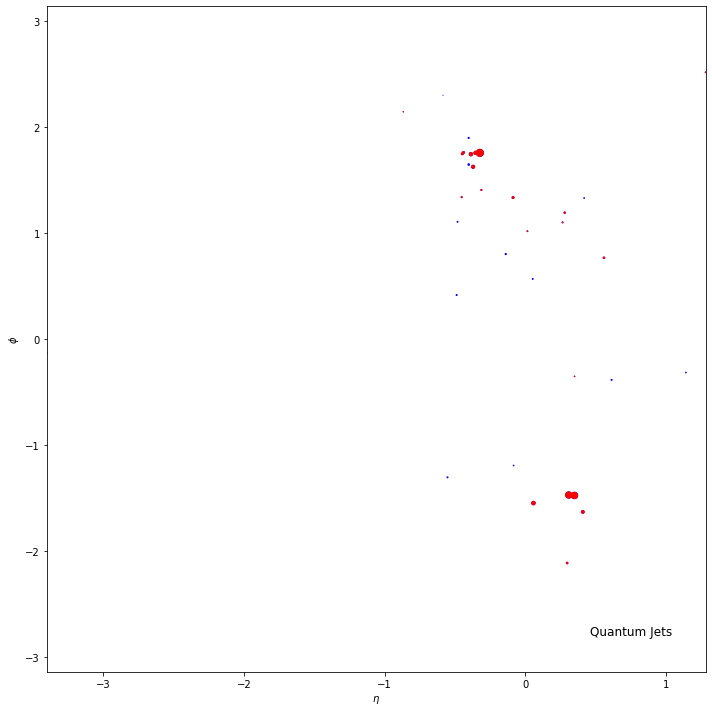

In [95]:
fig = plt.figure(figsize=(10, 10))
ax = None

#pick a different color for each jet
colors = cm.rainbow(np.linspace(0,1,2))
cmap = LinearSegmentedColormap.from_list('cmap', colors, len(colors))
ax = fig.add_subplot(1,1,1, sharey=ax)
area = np.zeros((eta_edges.shape[0] - 1, phi_edges.shape[0] - 1),dtype=np.float64)

jetarea, _, _ = np.histogram2d(jet_particles['eta'], jet_particles['phi'], bins = (eta_edges, phi_edges))
area += 1 

#ax.imshow(np.ma.masked_where(area == 0, area).T, cmap=cmap, extent=extent, aspect=(eta_max-eta_min) / (2*np.pi), interpolation='none', origin='lower')

 # overlay original event
#ax.scatter(array['eta'], array['phi'],s=0 * array['pT'] / array['pT'].max())
ax.scatter(array['eta'], array['phi'],s=50 * array['pT'] / array['pT'].max(), c='b')
ax.scatter(jet_particles['eta'], jet_particles['phi'],s=50 * jet_particles['pT'] / array['pT'].max(), c='r')

ax.set_xlim(extent[:2])
ax.set_ylim(extent[2:])
ax.set_ylabel(r'$\phi$')
ax.set_xlabel(r'$\eta$')
ax.text(0.95, 0.05, 'Quantum Jets',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        fontsize=12)

fig.subplots_adjust(hspace=0)
plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
fig.tight_layout()

In [ ]:
array[0]['eta']

In [ ]:
particles = np.zeros(array['eta'].shape[0] * array['phi'].shape[0], dtype=DTYPE_PTEPM)
particles['phi'] = np.reshape(array['phi'], particles[phi].shape)

In [ ]:
ghosts['eta'].shape

In [ ]:
particles.shap